Exercise for Graph V 🗃
Your task:
Make the graph on the right! You need to implement an Automatic Higher or Lower
Game.
Set the bounds to between 1 to 20. The Graph has to keep guessing (max number of
guesses is 7) where if the guess is correct, then it stops, but if not we keep looping until
we hit the max limit of 7.
Each time a number is guessed, the hint node should say higher or lower and the graph
should account for this information and guess the next guess accordingly.
Input: {"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1,
"upper_bound": 20}
Hint: It will need to adjust its bounds after every guess based on the hint provided by the hint node

In [3]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END
import random

## Create StateAgent Class

In [ ]:
class MystateAgent(TypedDict):
    player_name: str
    magic_number: int
    guesses: List[int]
    hint: str
    attempts: int
    lower_bound: int
    upper_bound: int


## Create node function for greeting and initialize

In [5]:
def setup_node(state: MystateAgent) -> MystateAgent:
    """ Greeting function and initialize"""

    print(f'Hi {state["player_name"]}, welcome to the Number Guessing Game!')
    state['lower_bound'] = 1
    state['upper_bound'] = 20
    state['magic_number'] = random.randint(state['lower_bound'], state['upper_bound'])

    state['guesses'] = []
    state['attempts'] = 0

    return state


## Create the Guess function node

In [56]:
def guess_node(state: MystateAgent) -> MystateAgent:
    """ get the next random guess """

    state['attempts'] += 1
    guess = random.randint(state['lower_bound'], state['upper_bound'])
    state['guesses'].append(guess)
    
    return state


## Create the Hint function node

In [99]:
def hint_node(state: MystateAgent) -> MystateAgent:
    """ Provide a hint based on the player's previous guesses """

    last_guess = state['guesses'][-1]
    if last_guess == state['magic_number']:
        state['hint'] = "Congratulations! You've guessed the magic number."
    elif last_guess < state['magic_number']:
        state['lower_bound'] = max(state['lower_bound'], last_guess + 1)
        state['hint'] = f"Try a higher number than {last_guess}."
    elif last_guess > state['magic_number']:
        state['upper_bound'] = min(state['upper_bound'], last_guess - 1)
        state['hint'] = f"Try a lower number than {last_guess}."
    
    print(state['hint'])
    return state


In [104]:
def should_continue(state: MystateAgent) -> MystateAgent:
    """ Determine if the game should continue based on the state """
    last_guess = state['guesses'][-1]
    if last_guess == state['magic_number'] or state['attempts'] >= 7:
        return 'end'
    else:
        return 'continue'
    
    


## Create the graph

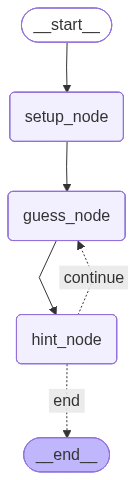

In [105]:
graph = StateGraph(MystateAgent)
graph.add_node('setup_node', setup_node)
graph.add_node('guess_node', guess_node)
graph.add_node('hint_node', hint_node)

graph.add_edge(START, 'setup_node')
graph.add_edge('setup_node', 'guess_node')
graph.add_edge('guess_node', 'hint_node')

graph.add_conditional_edges('hint_node', #Source Node
should_continue, #Action
  {
    'continue': 'guess_node',
    'end': END
})

app=graph.compile()
app

## Invoke graph

In [112]:
setup = MystateAgent(player_name="Student", guesses=[], attempts=0, lower_bound=1, upper_bound=20)
results = app.invoke(setup)
results

Hi Student, welcome to the Number Guessing Game!
Try a lower number than 10.
Try a lower number than 6.
Congratulations! You've guessed the magic number.


{'player_name': 'Student',
 'magic_number': 4,
 'guesses': [10, 6, 4],
 'attempts': 3,
 'lower_bound': 1,
 'upper_bound': 5}